In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [3]:
%matplotlib notebook

In [4]:
from engine import Engine
engine = Engine()

In [5]:
pred = pd.read_csv('pred.csv', index_col=0)
true = engine.counts
diff = pred - true

# Score

In [6]:
np.mean(np.sqrt(np.mean(diff ** 2)))

14.388560558589171

## Per class

In [7]:
np.sqrt(np.mean(diff ** 2))

adult_males        4.228372
subadult_males     5.820985
adult_females     21.626129
juveniles         22.508315
pups              17.759001
dtype: float64

## Per class, scaled by the sizes of the classes

In [8]:
np.sqrt(np.mean(diff ** 2)) / true.mean()

adult_males       0.732403
subadult_males    1.285696
adult_females     0.537366
juveniles         1.054800
pups              0.980315
dtype: float64

# Biases?

In [9]:
diff.mean()

adult_males      -0.578233
subadult_males   -1.142835
adult_females    -0.903996
juveniles        -2.317989
pups              0.957827
dtype: float64

# Worst examples

In [10]:
by_abs_error = diff.abs().sum(axis=1).sort_values(ascending=False).index
diff.loc[by_abs_error][:10]

,adult_males,subadult_males,adult_females,juveniles,pups
train_id,,,,,
70,1.019598,-3.809644,155.462250,-311.967133,34.646622
744,5.188296,6.643338,131.587723,-194.529755,30.939793
416,7.459819,-21.343900,117.267899,-174.816956,47.675285
587,-9.206711,4.979156,-64.682678,-18.931705,-196.692421
187,-15.180298,6.174955,-85.006683,87.116760,-91.736176
291,-14.453304,-4.726501,-64.260208,53.006599,-105.434128
900,-0.967438,16.276043,-134.531616,46.971565,-42.235291
590,-19.095577,2.354988,-5.435883,100.787247,-96.278610
0,-23.823341,14.097837,-74.260101,54.676353,-52.315948


In [11]:
import keras_density

Using TensorFlow backend.


In [12]:
model = keras_density.build_model()
model.load_weights('keras_density.hdf5')

In [13]:
def show_predicted_density(tid, cls=None):
    density_pred = keras_density.predict_large_image(model, engine.training_mmap_image(tid))
    density_true = engine.training_density(tid, scale=32)
    density_diff = density_pred - density_true
    if cls is None:
        density_pred = density_pred.sum(axis=-1)
        density_true = density_true.sum(axis=-1)
        cls_name = "all"
    else:
        density_pred = density_pred[:,:,cls]
        density_true = density_true[:,:,cls]
        cls_name = engine.class_names[cls]
    fig, axs = plt.subplots(1,2)
    axs[0].set_title('pred {} #{}'.format(cls_name, tid))
    axs[0].imshow(density_pred)
    axs[1].set_title('true {} #{}'.format(cls_name, tid))
    axs[1].imshow(density_true)
    

<IPython.core.display.Javascript object>


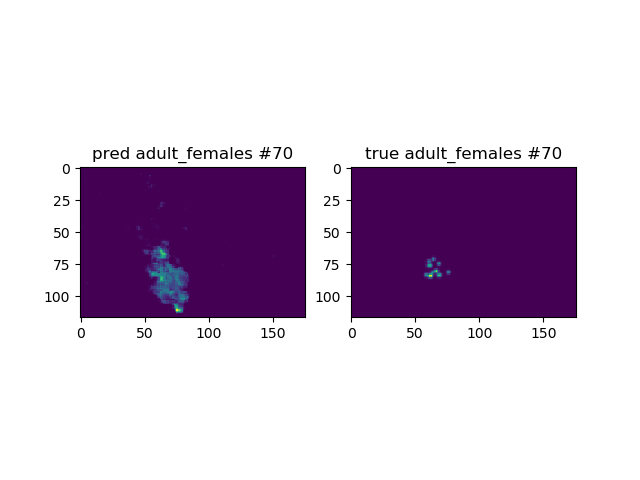

In [79]:
show_predicted_density(70, engine.class_by_name['adult_females'])

<IPython.core.display.Javascript object>


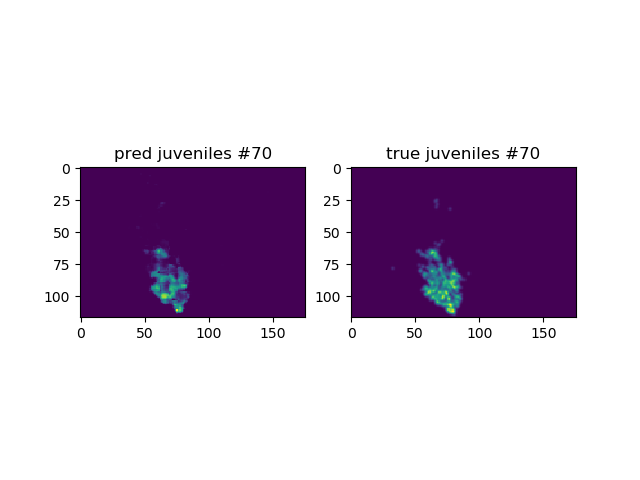

In [80]:
show_predicted_density(70, engine.class_by_name['juveniles'])

<IPython.core.display.Javascript object>


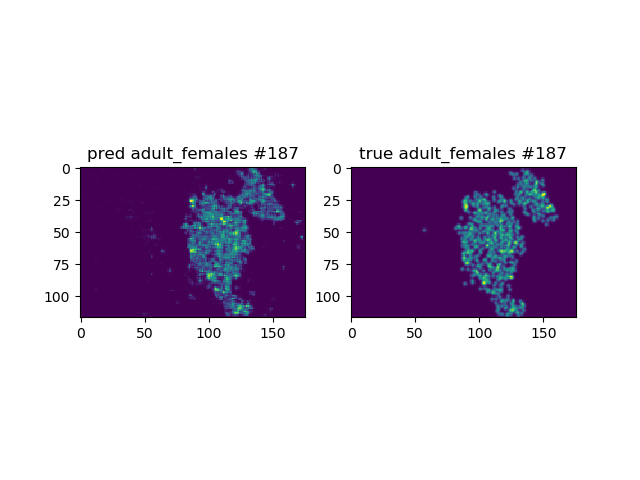

In [14]:
show_predicted_density(187, engine.class_by_name['adult_females'])

<IPython.core.display.Javascript object>


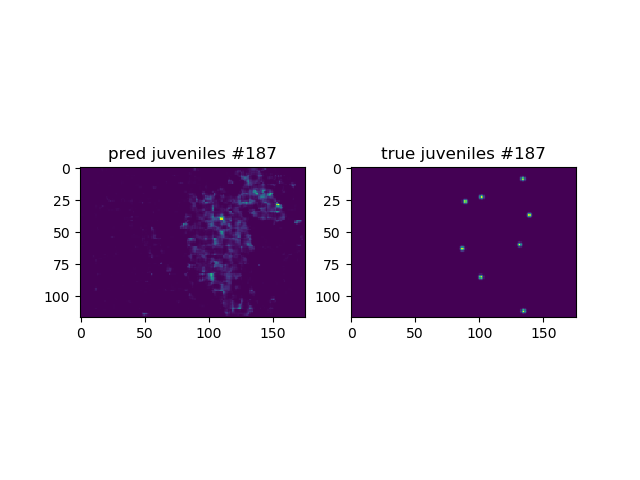

In [15]:
show_predicted_density(187, engine.class_by_name['juveniles'])

<IPython.core.display.Javascript object>


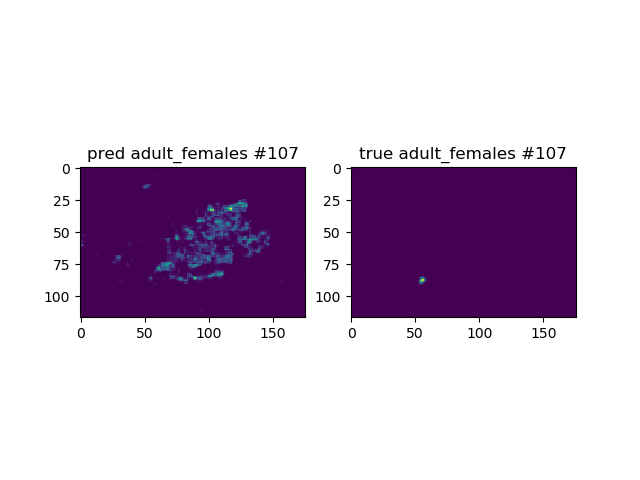

In [84]:
show_predicted_density(107, engine.class_by_name['adult_females'])

<IPython.core.display.Javascript object>


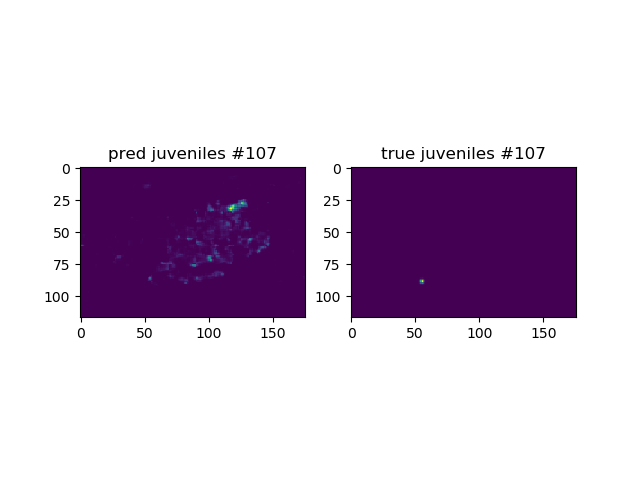

In [83]:
show_predicted_density(107, engine.class_by_name['juveniles'])

<IPython.core.display.Javascript object>


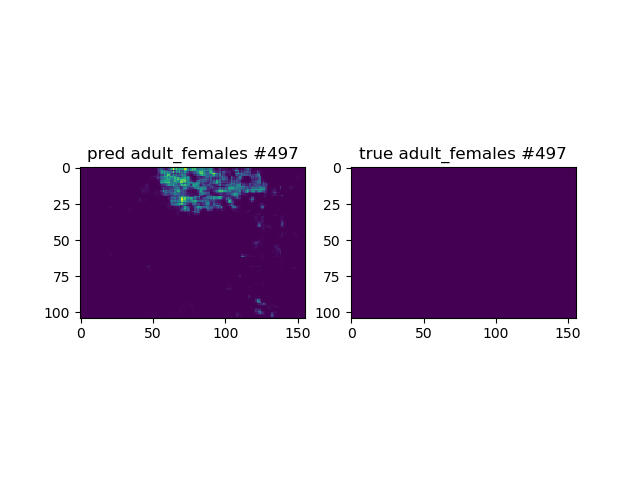

In [85]:
show_predicted_density(497, engine.class_by_name['adult_females'])

<IPython.core.display.Javascript object>


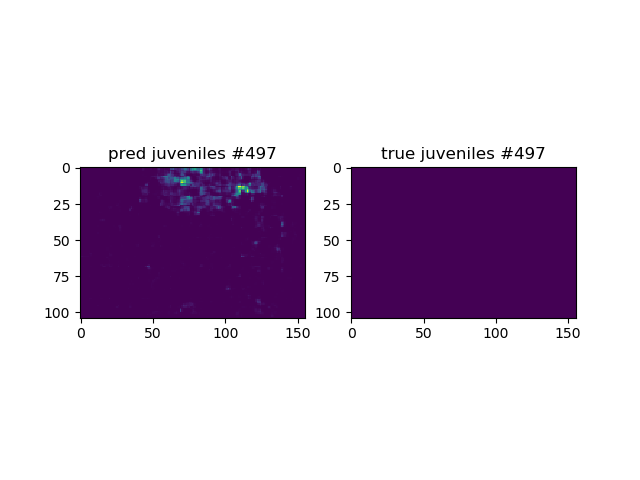

In [86]:
show_predicted_density(497, engine.class_by_name['juveniles'])